In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("maaslar.csv")

In [3]:
df.head()

,unvan,Egitim Seviyesi,maas
0,Cayci,1,2250
1,Sekreter,2,2500
2,Uzman Yardimcisi,3,3000
3,Uzman,4,4000
4,Proje Yoneticisi,5,5500


In [4]:
y = df.iloc[:,2:].values
x = df.iloc[:,1:2].values

In [5]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [6]:
lr.fit(x,y)

LinearRegression()

In [7]:
df["maas"].values

array([ 2250,  2500,  3000,  4000,  5500,  7500, 10000, 15000, 25000,
       50000], dtype=int64)

In [8]:
df.iloc[:,2:].values

array([[ 2250],
       [ 2500],
       [ 3000],
       [ 4000],
       [ 5500],
       [ 7500],
       [10000],
       [15000],
       [25000],
       [50000]], dtype=int64)

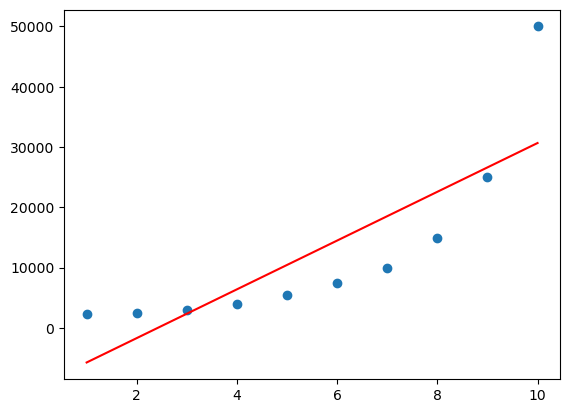

In [9]:
plt.scatter(x,y)
plt.plot(x,lr.predict(x),"r")

In [10]:
from sklearn.preprocessing import PolynomialFeatures
pl = PolynomialFeatures(degree=2)

In [11]:
x_poly = pl.fit_transform(x)

In [12]:
x_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [13]:
lr2 = LinearRegression()

In [14]:
lr2.fit(x_poly,y)

LinearRegression()

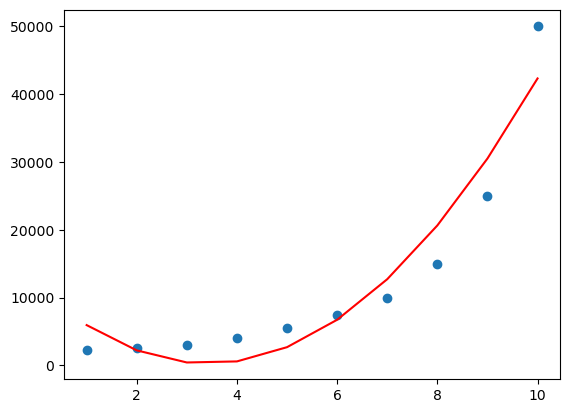

In [15]:
plt.scatter(x,y)
plt.plot(x,lr2.predict(pl.fit_transform(x)),"r")

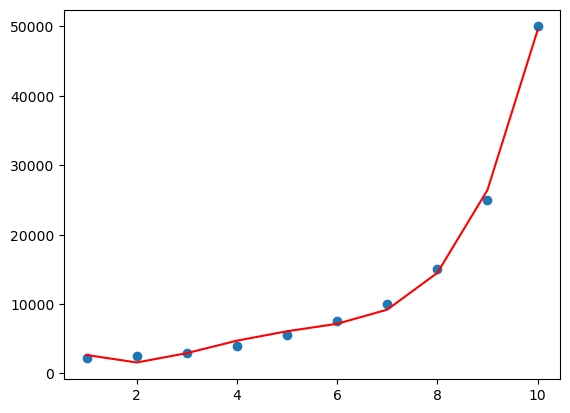

In [16]:
pl = PolynomialFeatures(degree=4)
x_poly = pl.fit_transform(x)
lr3 = LinearRegression()
lr3.fit(x_poly,y)
plt.scatter(x,y)
plt.plot(x,lr3.predict(pl.fit_transform(x)),"r")

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
sc1 = StandardScaler()
sc2 = StandardScaler()
x_scale = sc1.fit_transform(x)
y_scale = sc2.fit_transform(y)

In [19]:
from sklearn.svm import SVR

In [20]:
svr = SVR(kernel='rbf')
svr.fit(x_scale,y_scale)

C:\Users\Veli\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

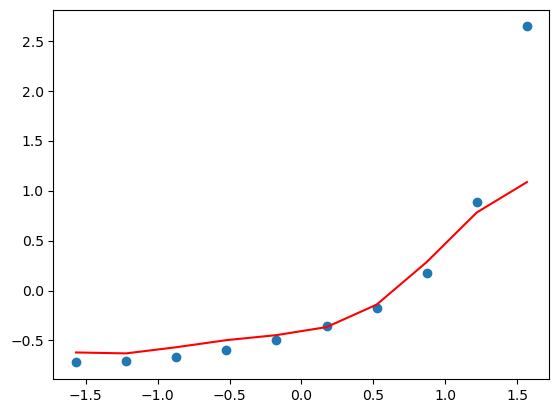

In [21]:
plt.scatter(x_scale,y_scale)
plt.plot(x_scale,svr.predict(x_scale), "r")

In [22]:
svr.predict([[11]])

array([0.01150915])

In [23]:
from sklearn.tree import DecisionTreeRegressor

In [24]:
dtr = DecisionTreeRegressor(random_state=0)

In [25]:
dtr.fit(x,y)

DecisionTreeRegressor(random_state=0)

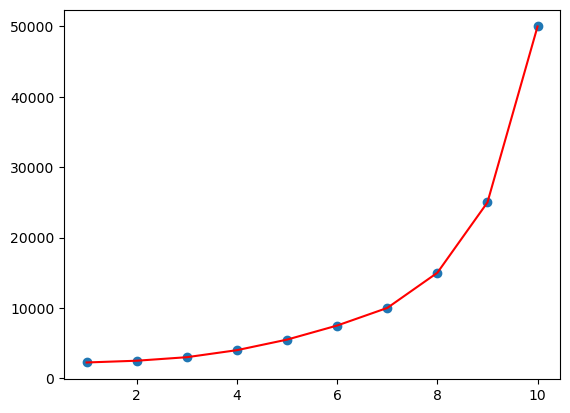

In [26]:
plt.scatter(x,y)
plt.plot(x,dtr.predict(x),"r")

In [27]:
#Başka değer tahmin edemiyor
dtr.predict([[11]])

array([50000.])

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
rfr = RandomForestRegressor(n_estimators=10,random_state=0)

In [30]:
rfr.fit(x,y.ravel())

RandomForestRegressor(n_estimators=10, random_state=0)

In [31]:
rfr.predict([[11]])

array([42500.])

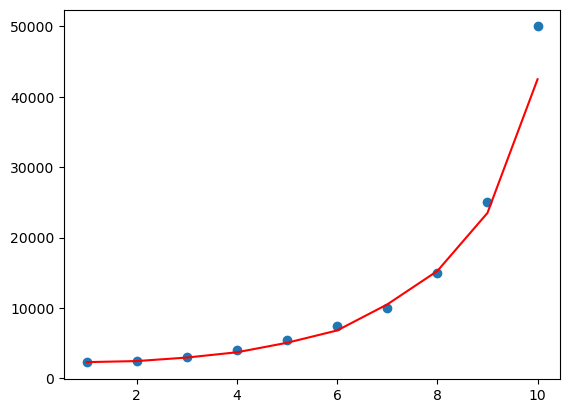

In [32]:
plt.scatter(x,y)
plt.plot(x,rfr.predict(x), "r")

In [33]:
from sklearn.metrics import r2_score

In [34]:
#RANDOM FOREST R2 DEĞERİ
r2_score(y,rfr.predict(x))

0.9704434230386582

In [36]:
#desicion tree değeri
r2_score(y,dtr.predict(x))
#daha iyi görünüyor fakat yanlış

1.0

In [37]:
#SVR degeri
r2_score(y_scale,svr.predict(x_scale))

0.7513836788854973

In [40]:
#polynomal
r2_score(y , lr3.predict(pl.fit_transform(x)))

0.9973922891706613